# Atividade 3

# Atividade mínima


1- 65 pontos: Considere um circulo de raio r=1 inscrito em um quadrado de lado 2r=2. A área do círculo é π.r^2=π  A área do quadrado é 
4.A razão entre a área do círculo e a área do quadrado é π/4.Se gerarmos N pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será π/4.Assim, podemos estimar π como 4 vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados N para ver como o resultado muda. Implemente na forma de uma função com assinatura:


In [4]:
import random

def pi_monte_carlo(N):

    dentro_circulo = 0

    for _ in range(N):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)  # Gera pontos no quadrado [-1,1] x [-1,1]
        if x**2 + y**2 <= 1:  # Verifica se o ponto está dentro do círculo de raio 1
            dentro_circulo += 1

    estimativa_pi = 4 * (dentro_circulo / N)  # Calcula a estimativa de π
    return estimativa_pi

# Teste da função com diferentes valores de N
if __name__ == "__main__":
    for N in [100, 1000, 10000, 100000]:
        print(f"N = {N}, Estimativa de π: {pi_monte_carlo(N)}")

N = 100, Estimativa de π: 3.4
N = 1000, Estimativa de π: 3.132
N = 10000, Estimativa de π: 3.1332
N = 100000, Estimativa de π: 3.14264


2- Mapa logístico, caos e fractais (etapa 1)

In [12]:
#Etapa 1- Mapa logístico, caos e fractais (etapa 1)

# Atividades intermediárias: 20 pts

 via Monte Carlo (etapa 2) Modifique sua função pi_monte_carlo(N) para que agora receba um booleando retorna_pontos que indica se a função deve retornar os pontos sorteados separados em duas listas: dentro e fora. Usando estas listas, faça um gráfico dos pontos sorteados, com os pontos dentro do círculo em azul e os pontos fora em vermelho. A assinatura da função deve ser:

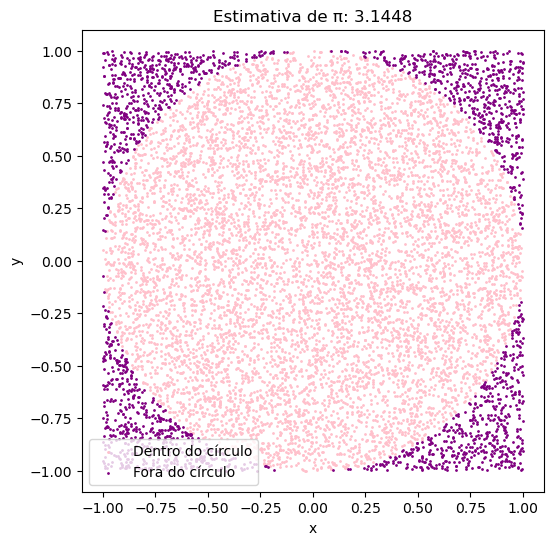

In [3]:
import random
import matplotlib.pyplot as plt

def pi_monte_carlo(N, retorna_pontos=False):
    '''
  
    '''
    dentro = []
    fora = []
    pontos_dentro_circulo = 0

    for _ in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distancia = x**2 + y**2

        if distancia <= 1:
            pontos_dentro_circulo += 1
            dentro.append((x, y))
        else:
            fora.append((x, y))

    estimativa_pi = 4 * pontos_dentro_circulo / N

    if retorna_pontos:
        return estimativa_pi, dentro, fora
    else:
        return estimativa_pi

# Exemplo de uso:
N = 10000
estimativa_pi, dentro, fora = pi_monte_carlo(N, retorna_pontos=True)

# Plotando os pontos
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*dentro), color='pink', s=1, label='Dentro do círculo')
plt.scatter(*zip(*fora), color='purple', s=1, label='Fora do círculo')
plt.title(f'Estimativa de π: {estimativa_pi:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
#True=1
#False= 0

# via Monte Carlo (etapa 3):
import random
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo(N)
     '''
  
     '''
    x = np.logspace()
    y = x ** 2 / (np.exp(x) + 1)

    
    
x = np.array([])
y = np.array([])

#linearizando através do fit
coefficients = np.polyfit()
print("Linear Fit Coefficients:", coefficients)

# Create polynomial function
p = np.poly1d(coefficients)

#plotando:
plt.plot
plt.loglog
plt.semilogy
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*dentro), color='pink', s=1, label='Dentro do círculo')
plt.scatter(*zip(*fora), color='purple', s=1, label='Fora do círculo')
plt.title(f'Estimativa de π: {estimativa_pi:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# via Monte Carlo (etapa 4):
